In [111]:
import nltk
from nltk.tokenize import TweetTokenizer
import pandas as pd

# Question 1

In [112]:
tokenizer = TweetTokenizer()
df = pd.read_csv(r"C:\Users\Anshuman Yadav\Documents\tweets-dataset.csv")
tokens = []
types = set()


for i in df['Sentence']:
    x = tokenizer.tokenize(i)
    for j in range(len(x)):
        types.add(x[j])
        tokens.append(x[j])
        
print("Types in the whole tweet dataset : " + str(len(types)))
print("Tokens in the whole tweet dataset : " + str(len(tokens)))
print("TTR of the whole tweet dataset : " + str(len(types)/len(tokens)))


Types in the whole tweet dataset : 49112
Tokens in the whole tweet dataset : 367840
TTR of the whole tweet dataset : 0.13351457155284907


# Question 2

In [113]:
from nltk.corpus import wordnet
import random
import math
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

In [114]:
x = []
types = list(types)
freq = dict()
for i in range(10000):
    c = random.randint(0,49111)
    synonyms = []
    for syn in wordnet.synsets(types[c]):   #synonims/meanings of random 10000 words from wordnet
        for l in syn.lemmas():
            if(l.name() == types[c]):
                synonyms.append(l.name())
#     if(len(synonyms) >= 4 and len(synonyms)<=50):  
    x.append([len(synonyms),len(types[c])])
p = []
q = []
for i in range(len(x)):
    p.append(x[i][0])   #making array containing m*sqrt(l)
    q.append(math.sqrt(x[i][1]))

## Meanings versus Square root of frequency

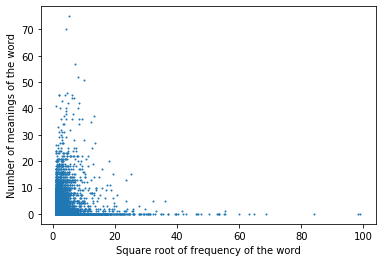

In [146]:
freq = dict()
mean1 = dict()
for i in range(len(tokens)):
    if(tokens[i] not in freq):
        freq[tokens[i]] = 1
        synonyms = []
        for syn in wordnet.synsets(tokens[i]):   
            for l in syn.lemmas():
             if(l.name() == tokens[i]):
                synonyms.append(l.name())
        mean1[tokens[i]] = len(synonyms)
    else:
        freq[tokens[i]] += 1
x1 = []
y1 = []
for i in freq.keys():
    x1.append(math.sqrt(freq[i]))
    y1.append(mean1[i])
plt.scatter(x1,y1,s = 1) 
plt.xlabel("Square root of frequency of the word")
plt.ylabel("Number of meanings of the word")
plt.show()

## Length versus frequency of the word

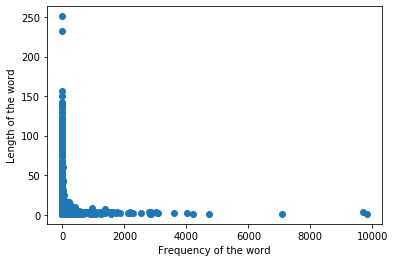

In [147]:
x2 = []
y2 = []
for i in freq.keys():
    x2.append(freq[i])
    y2.append(len(i))
plt.scatter(x2,y2)
plt.xlabel("Frequency of the word")
plt.ylabel("Length of the word")
plt.show()
    

## Meanings vs square root of length

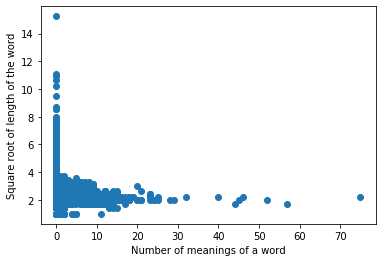

In [148]:
# coefs = poly.polyfit(p, q, 2)
# ffit = poly.polyval(x_new, coefs)
plt.scatter(p,q) 
plt.xlabel("Number of meanings of a word")
plt.ylabel("Square root of length of the word")
plt.show()

# Question 3

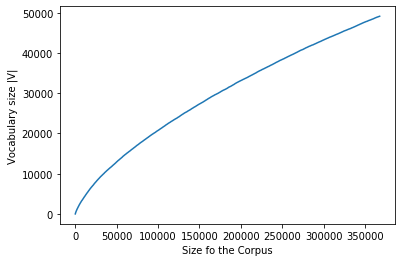

In [93]:
count = 0
x = []
y = set()
z =[]
for i in range(0,len(tokens)):
    x.append(i)
    y.add(tokens[i])
    z.append(len(y))
plt.plot(x,z)
plt.xlabel("Size fo the Corpus")
plt.ylabel("Vocabulary size |V|")
plt.show()